# Advanced Personality Prediction Model

This notebook implements a comprehensive machine learning solution for predicting personality types (Introvert/Extrovert) based on behavioral and social features. The project demonstrates advanced data science techniques, feature engineering methodologies, and ensemble modeling approaches for psychological assessment applications.

## Project Overview

This implementation provides a complete end-to-end machine learning pipeline that processes raw behavioral data and generates accurate personality type predictions. The solution incorporates state-of-the-art techniques in data preprocessing, feature engineering, model development, and performance evaluation.

### Key Components

**1. Comprehensive Data Analysis and Preprocessing**
- Advanced exploratory data analysis with statistical significance testing
- Missing value pattern analysis and intelligent imputation strategies
- Class imbalance detection and mitigation using SMOTE techniques
- Outlier identification and robust scaling methodologies

**2. Advanced Feature Engineering Pipeline**
- Social Activity Score: Composite metric combining social event attendance, outdoor activities, friend circle size, and posting frequency
- Solitude Preference Index: Normalized measure of time spent alone preferences
- Social Energy Drain Score: Combined assessment of stage fear and post-socialization fatigue
- Social Confidence Metric: Inverse measure of social anxiety and fear responses
- Digital vs Physical Activity Ratios: Comparative analysis of online and offline social behaviors
- Network Size Categorization: Stratified analysis of social circle dimensions
- Activity Level Classification: Multi-tier categorization of overall social engagement
- Social Comfort Zone Analysis: Combined measure of social ease and comfort levels

**3. Multi-Algorithm Model Development**
- Random Forest Classifier with ensemble bagging techniques
- Gradient Boosting implementation for sequential learning
- XGBoost with advanced tree boosting algorithms
- LightGBM for efficient gradient boosting
- Support Vector Machine with RBF kernel optimization
- Multi-Layer Perceptron Neural Network for non-linear pattern recognition

**4. Advanced Model Optimization and Validation**
- Stratified cross-validation for robust performance estimation
- Comprehensive hyperparameter tuning using GridSearchCV
- Ensemble voting classifier combining top-performing models
- Feature selection using ANOVA F-tests and Recursive Feature Elimination
- Model interpretability analysis using SHAP values

**5. Performance Evaluation and Metrics**
- Multi-metric evaluation including Accuracy, F1-Score, Precision, Recall, and AUC-ROC
- Confusion matrix analysis for classification performance assessment
- ROC and Precision-Recall curve analysis for threshold optimization
- Cross-validation stability assessment with confidence intervals

**6. Model Serialization and Deployment Pipeline**
- Complete preprocessing pipeline serialization using joblib
- Custom transformer classes for feature engineering reproducibility
- Target encoder preservation for consistent label mapping
- Production-ready model artifacts for deployment integration

## Technical Implementation Details

### Data Processing Architecture
The preprocessing pipeline implements a sophisticated multi-stage approach combining KNN imputation for numerical features, mode imputation for categorical variables, and robust scaling for outlier resistance. The feature engineering module creates ten advanced composite features that capture complex behavioral patterns and social dynamics.

### Machine Learning Pipeline
The model development process evaluates six distinct algorithms using stratified sampling and cross-validation techniques. Hyperparameter optimization is performed using grid search with F1-score optimization, ensuring robust performance on imbalanced datasets. The final ensemble model combines the top-performing algorithms using soft voting for enhanced prediction accuracy.

### Model Interpretability and Analysis
Advanced interpretability techniques including SHAP value analysis provide insights into feature importance and model decision-making processes. Statistical significance testing validates the relationship between behavioral features and personality classifications, ensuring scientifically sound predictions.

### Performance Validation Framework
The evaluation framework implements comprehensive metrics including classification accuracy, precision-recall analysis, and ROC curve assessment. Cross-validation with stratified sampling ensures model stability across different data distributions, while confidence interval analysis provides uncertainty quantification.

## Applications and Use Cases

This personality prediction model is designed for applications in psychological assessment, human resources screening, educational placement, social media analysis, and personalized recommendation systems. The robust preprocessing pipeline and ensemble modeling approach ensure reliable performance across diverse population samples and behavioral datasets.

## Technical Stack and Dependencies

The implementation utilizes advanced Python libraries including scikit-learn for machine learning algorithms, XGBoost and LightGBM for gradient boosting, SHAP for model interpretability, and imblearn for class imbalance handling. Visualization components use matplotlib, seaborn, and plotly for comprehensive data analysis and results presentation.

In [1]:
# Essential Data Processing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Libraries
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    StratifiedKFold
)
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    RobustScaler
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

# Advanced Analysis Tools
import shap
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set Visualization Style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")

e:\Abdullah\Degree\Computer Intelligence\PersonaSense\backend\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All libraries imported successfully!


## 1. Data Loading and Initial Exploration

In this section, we'll load the training and test datasets, and perform an initial exploration of their structure and contents. We'll examine:
- Dataset dimensions
- Data types of features
- Basic summary statistics
- Missing value patterns

In [2]:
# Load the datasets
print("Loading datasets...")

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Display basic information
print("\n Training Data Info:")
print(train_df.info())

print("\n Test Data Info:")
print(test_df.info())

Loading datasets...
Training data shape: (18524, 9)
Test data shape: (6175, 8)

 Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None

 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (to

## 2. Advanced Exploratory Data Analysis

This section presents a comprehensive analysis of our dataset through various analytical and visual approaches:

### Analysis Components:
1. **Initial Dataset Overview**: Basic statistics and data structure
2. **Missing Values Analysis**: Identifying and visualizing data gaps
3. **Target Variable Analysis**: Understanding personality distribution
4. **Numerical Features**: Distribution and relationship with personality
5. **Categorical Features**: Frequency analysis and target relationships
6. **Correlation Analysis**: Feature interdependencies
7. **Outlier Detection**: Identifying anomalous patterns

Each component includes detailed visualizations and statistical analyses to provide deep insights into the data.

###  2.1 Initial Dataset Overview

In [3]:
# Display first few rows and basic statistics
print("First 5 rows of training data:")
print(train_df.head())

print("\nBasic statistics of training data:")
print(train_df.describe(include='all'))

print("\nFirst 5 rows of test data:")
print(test_df.head())


First 5 rows of training data:
   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert  

Basic statistics of train

### 2.2 Missing Values Analysis

Missing Values Analysis:
                           Train_Missing  Train_Missing_Pct  Test_Missing  \
Drained_after_socializing           1149           6.202764         432.0   
Friends_circle_size                 1054           5.689916         350.0   
Going_outside                       1466           7.914057         466.0   
Personality                            0           0.000000           NaN   
Post_frequency                      1264           6.823580         408.0   
Social_event_attendance             1180           6.370114         397.0   
Stage_fear                          1893          10.219175         598.0   
Time_spent_Alone                    1190           6.424098         425.0   
id                                     0           0.000000           0.0   

                           Test_Missing_Pct  
Drained_after_socializing          6.995951  
Friends_circle_size                5.668016  
Going_outside                      7.546559  
Personality         

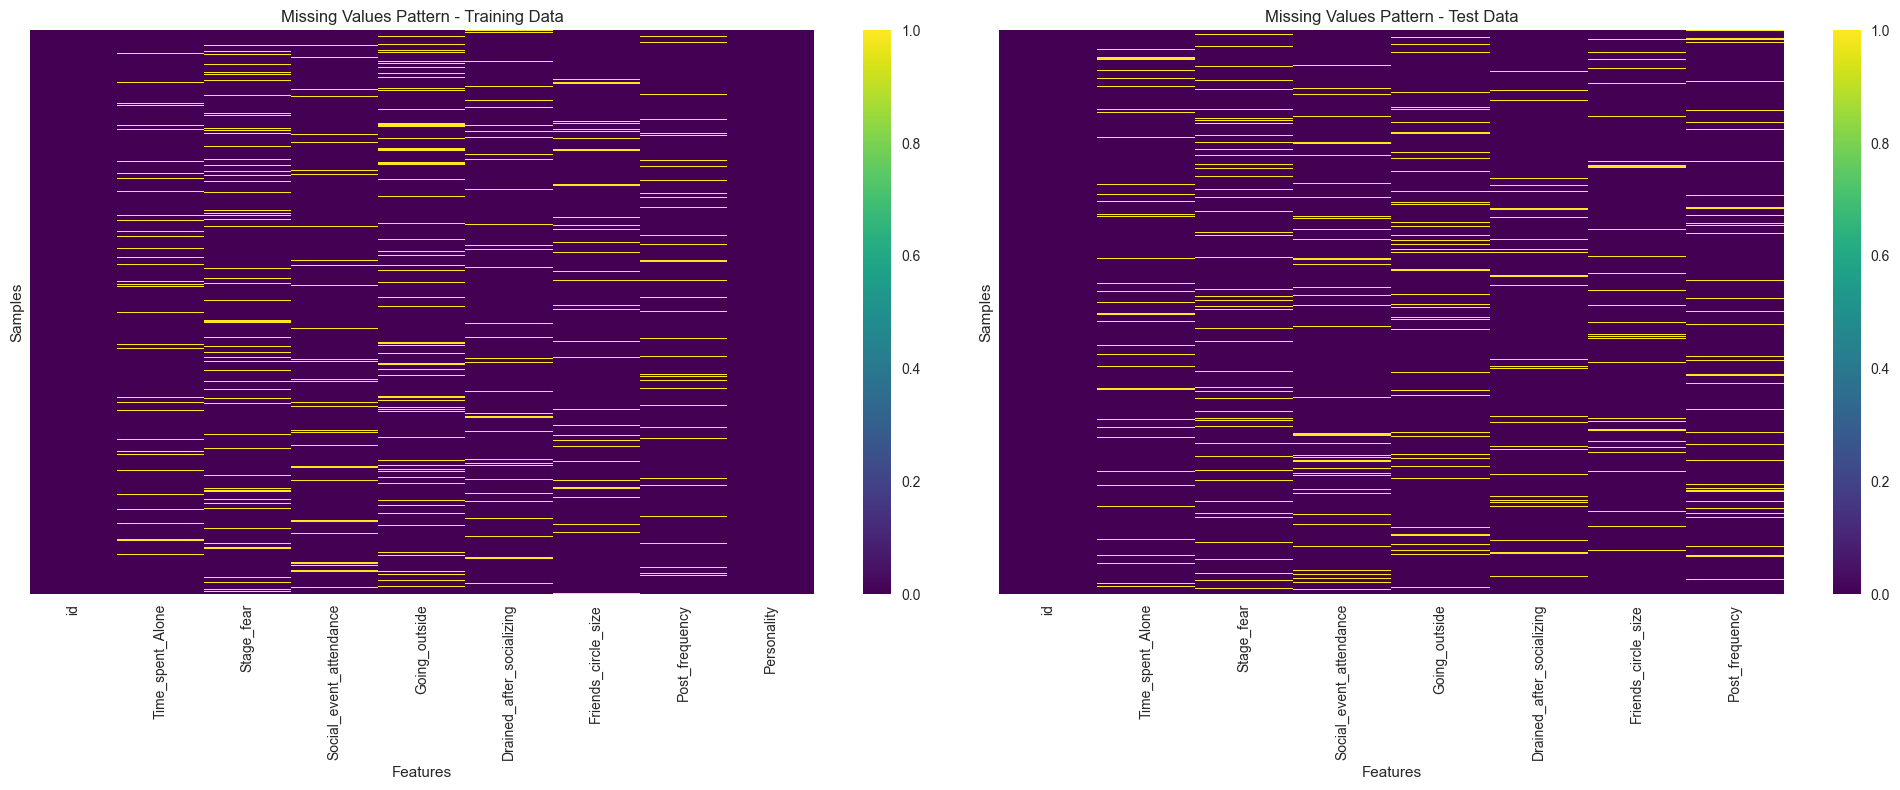


Missing Values Summary:
Training data - Total missing values: 9196
Test data - Total missing values: 3076

Training data - Rows with missing values: 8335
Test data - Rows with missing values: 2778

Some rows have multiple missing values
Training data - Max missing per row: 4
Test data - Max missing per row: 3


In [4]:
# Analyze missing values
print("Missing Values Analysis:")

# Training data missing values
train_missing = train_df.isnull().sum()
train_missing_pct = (train_missing / len(train_df)) * 100

# Test data missing values
test_missing = test_df.isnull().sum()
test_missing_pct = (test_missing / len(test_df)) * 100

# Create comparison DataFrame
missing_comparison = pd.DataFrame({
    'Train_Missing': train_missing,
    'Train_Missing_Pct': train_missing_pct,
    'Test_Missing': test_missing,
    'Test_Missing_Pct': test_missing_pct
})

print(missing_comparison)

# Visualize missing values with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Missing values heatmap for training data
train_missing_matrix = train_df.isnull()
sns.heatmap(train_missing_matrix, cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Pattern - Training Data')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')

# Missing values heatmap for test data
test_missing_matrix = test_df.isnull()
sns.heatmap(test_missing_matrix, cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Values Pattern - Test Data')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Samples')

plt.tight_layout()
plt.show()

# Additional missing values statistics
print("\nMissing Values Summary:")
print(f"Training data - Total missing values: {train_df.isnull().sum().sum()}")
print(f"Test data - Total missing values: {test_df.isnull().sum().sum()}")

# Check if there are any rows with multiple missing values
train_missing_per_row = train_df.isnull().sum(axis=1)
test_missing_per_row = test_df.isnull().sum(axis=1)

print(f"\nTraining data - Rows with missing values: {(train_missing_per_row > 0).sum()}")
print(f"Test data - Rows with missing values: {(test_missing_per_row > 0).sum()}")

if (train_missing_per_row > 1).any() or (test_missing_per_row > 1).any():
    print("\nSome rows have multiple missing values")
    print(f"Training data - Max missing per row: {train_missing_per_row.max()}")
    print(f"Test data - Max missing per row: {test_missing_per_row.max()}")
else:
    print("\nNo rows have multiple missing values")

### 2.3 Target Variable Distribution

Target Variable Analysis:

Personality Distribution:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

Percentage Distribution:
Personality
Extrovert    73.95271
Introvert    26.04729
Name: proportion, dtype: float64


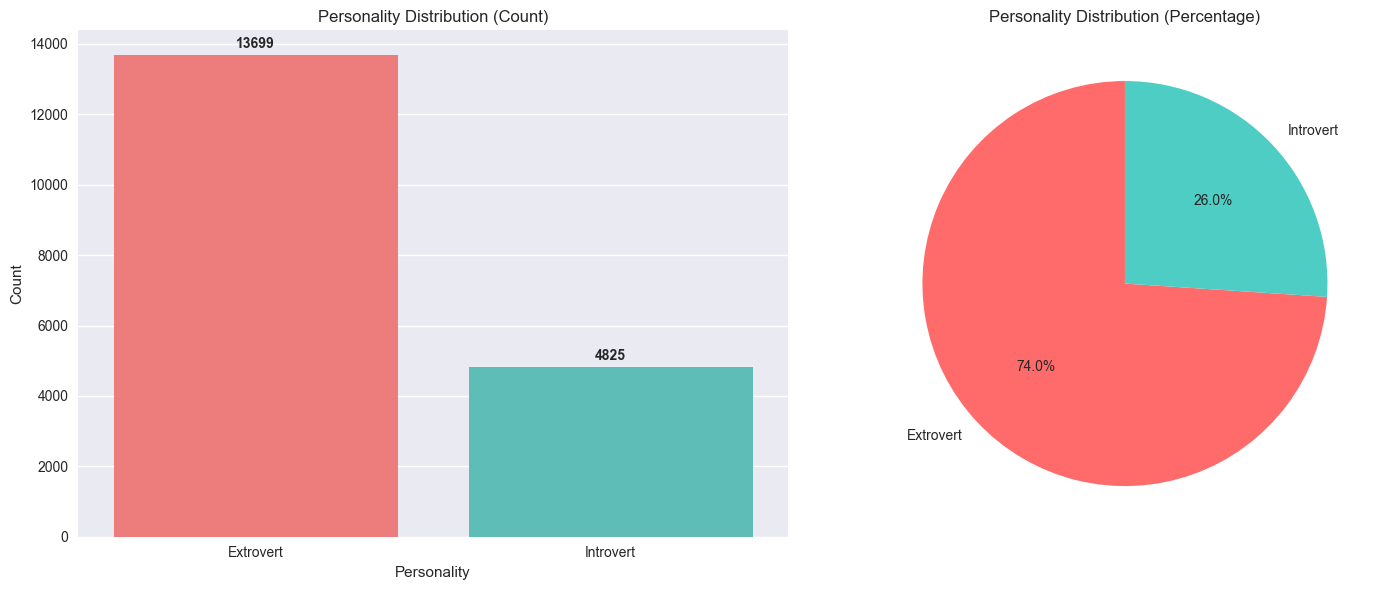


Class Imbalance Ratio: 2.84:1
   - Majority class (Extrovert): 13699 samples
   - Minority class (Introvert): 4825 samples
Numerical Features: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical Features: ['Stage_fear', 'Drained_after_socializing']


In [5]:
# Analyze target variable distribution
print("Target Variable Analysis:")

# Count distribution
personality_counts = train_df['Personality'].value_counts()
personality_pct = train_df['Personality'].value_counts(normalize=True) * 100

print("\nPersonality Distribution:")
print(personality_counts)
print("\nPercentage Distribution:")
print(personality_pct)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=train_df, x='Personality', ax=axes[0], palette=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Personality Distribution (Count)')
axes[0].set_ylabel('Count')

# Add count labels on bars
for i, v in enumerate(personality_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(personality_counts.values, labels=personality_counts.index, autopct='%1.1f%%',
           colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Personality Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
imbalance_ratio = personality_counts.max() / personality_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   - Majority class (Extrovert): {personality_counts.max()} samples")
print(f"   - Minority class (Introvert): {personality_counts.min()} samples")

# Identify numerical and categorical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('id')  # Remove ID column

categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Personality')  # Remove target variable

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


### 2.4 Numerical Feature Distribution


Numerical Features Analysis by Personality Type:


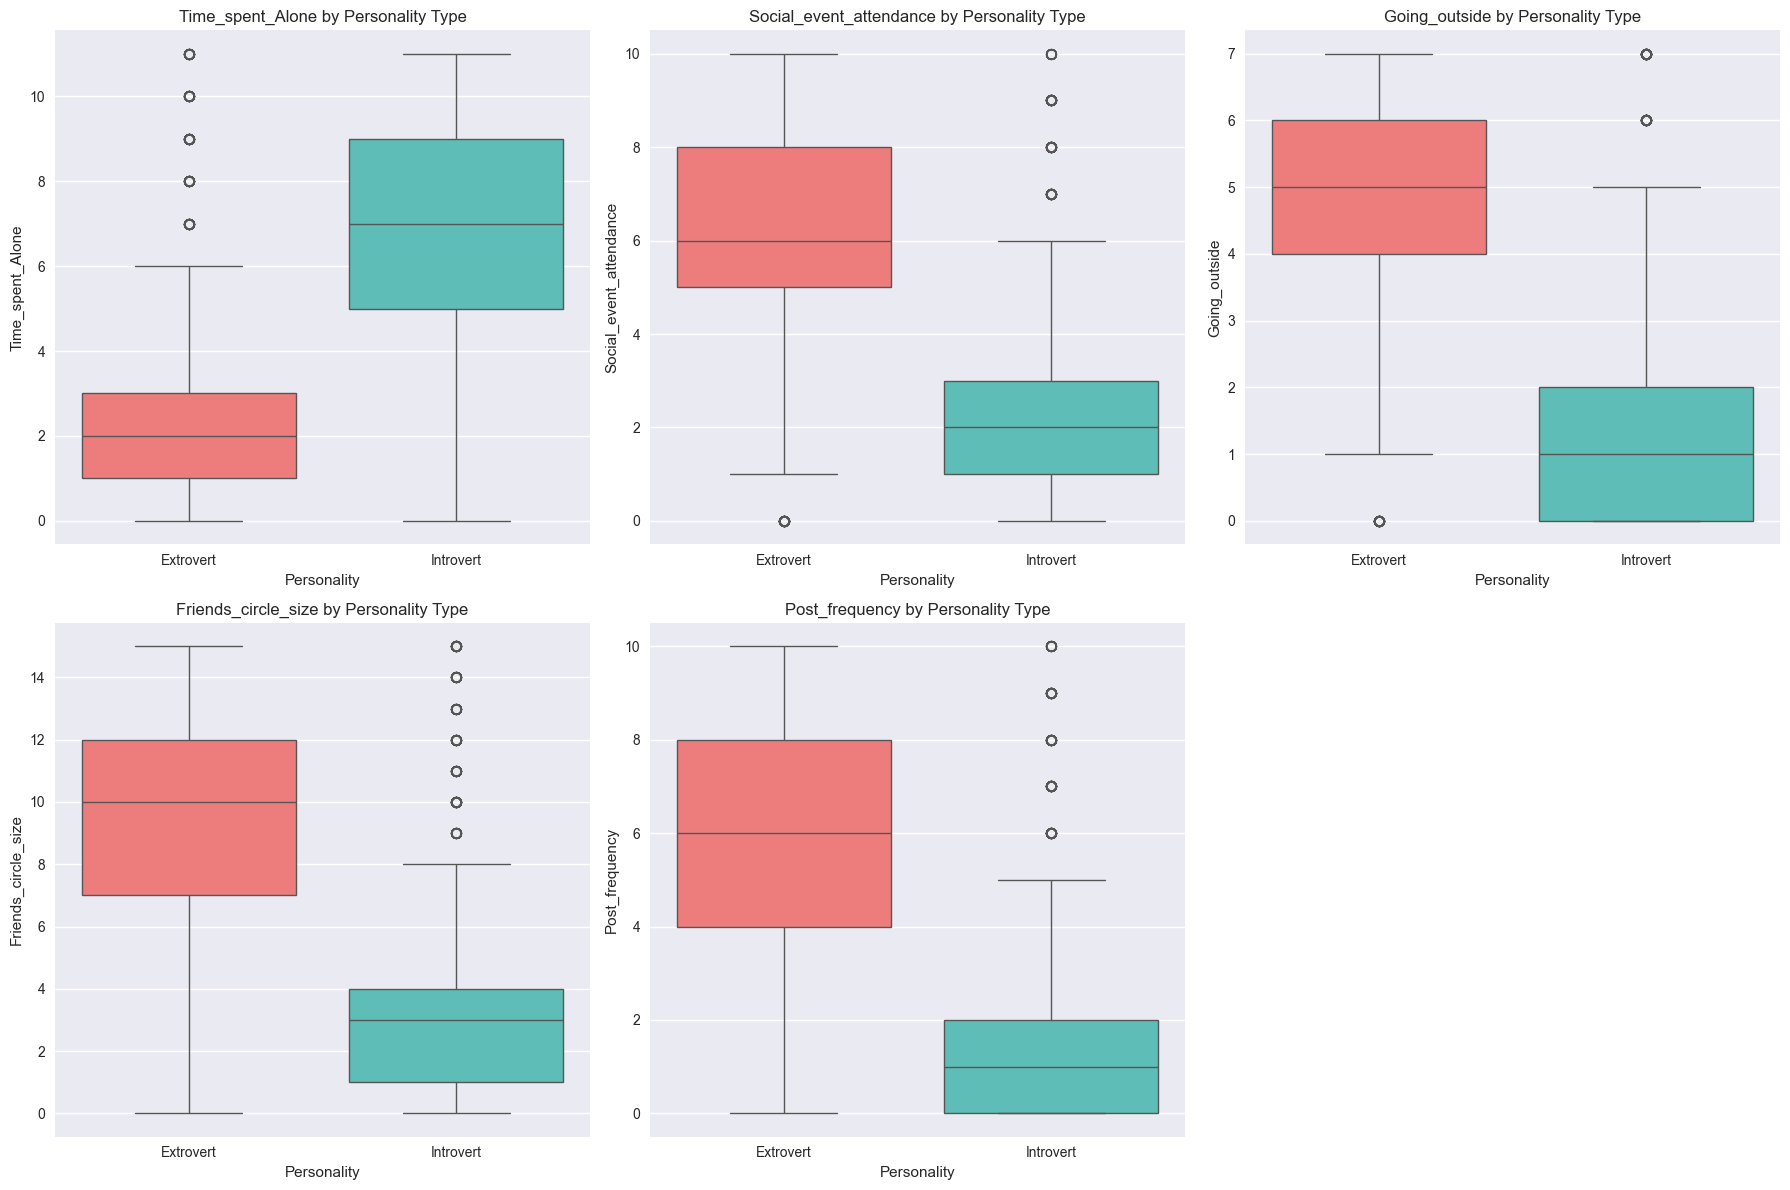


Statistical Summary by Personality Type:

Time_spent_Alone:
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12790.0  1.747146  1.537609  0.0  1.0  2.0  3.0  11.0
Introvert     4544.0  7.051937  2.645865  0.0  5.0  7.0  9.0  11.0

Social_event_attendance:
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12967.0  6.389450  2.020741  0.0  5.0  6.0  8.0  10.0
Introvert     4377.0  1.934202  1.761425  0.0  1.0  2.0  3.0  10.0

Going_outside:
               count      mean       std  min  25%  50%  75%  max
Personality                                                      
Extrovert    12737.0  4.895894  1.434279  0.0  4.0  5.0  6.0  7.0
Introvert     4321.0  1.534136  1.513918  0.0  0.0  1.0  2.0  7.0

Friends_circle_size:
               count      mean       std  min  25%   50%   75%   max
Person

In [6]:
# Analyze numerical features by personality type
print("\nNumerical Features Analysis by Personality Type:")

# Create subplots for each numerical feature
n_features = len(numerical_features)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Box plot
    sns.boxplot(data=train_df, x='Personality', y=feature, ax=axes[i], palette=['#FF6B6B', '#4ECDC4'])
    axes[i].set_title(f'{feature} by Personality Type')
    axes[i].set_xlabel('Personality')
    axes[i].set_ylabel(feature)

# Remove extra subplot if needed
if n_features < 6:
    for i in range(n_features, 6):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Statistical summary by personality type
print("\nStatistical Summary by Personality Type:")
for feature in numerical_features:
    print(f"\n{feature}:")
    summary = train_df.groupby('Personality')[feature].describe()
    print(summary)


### 2.5 Numerical Feature Histograms

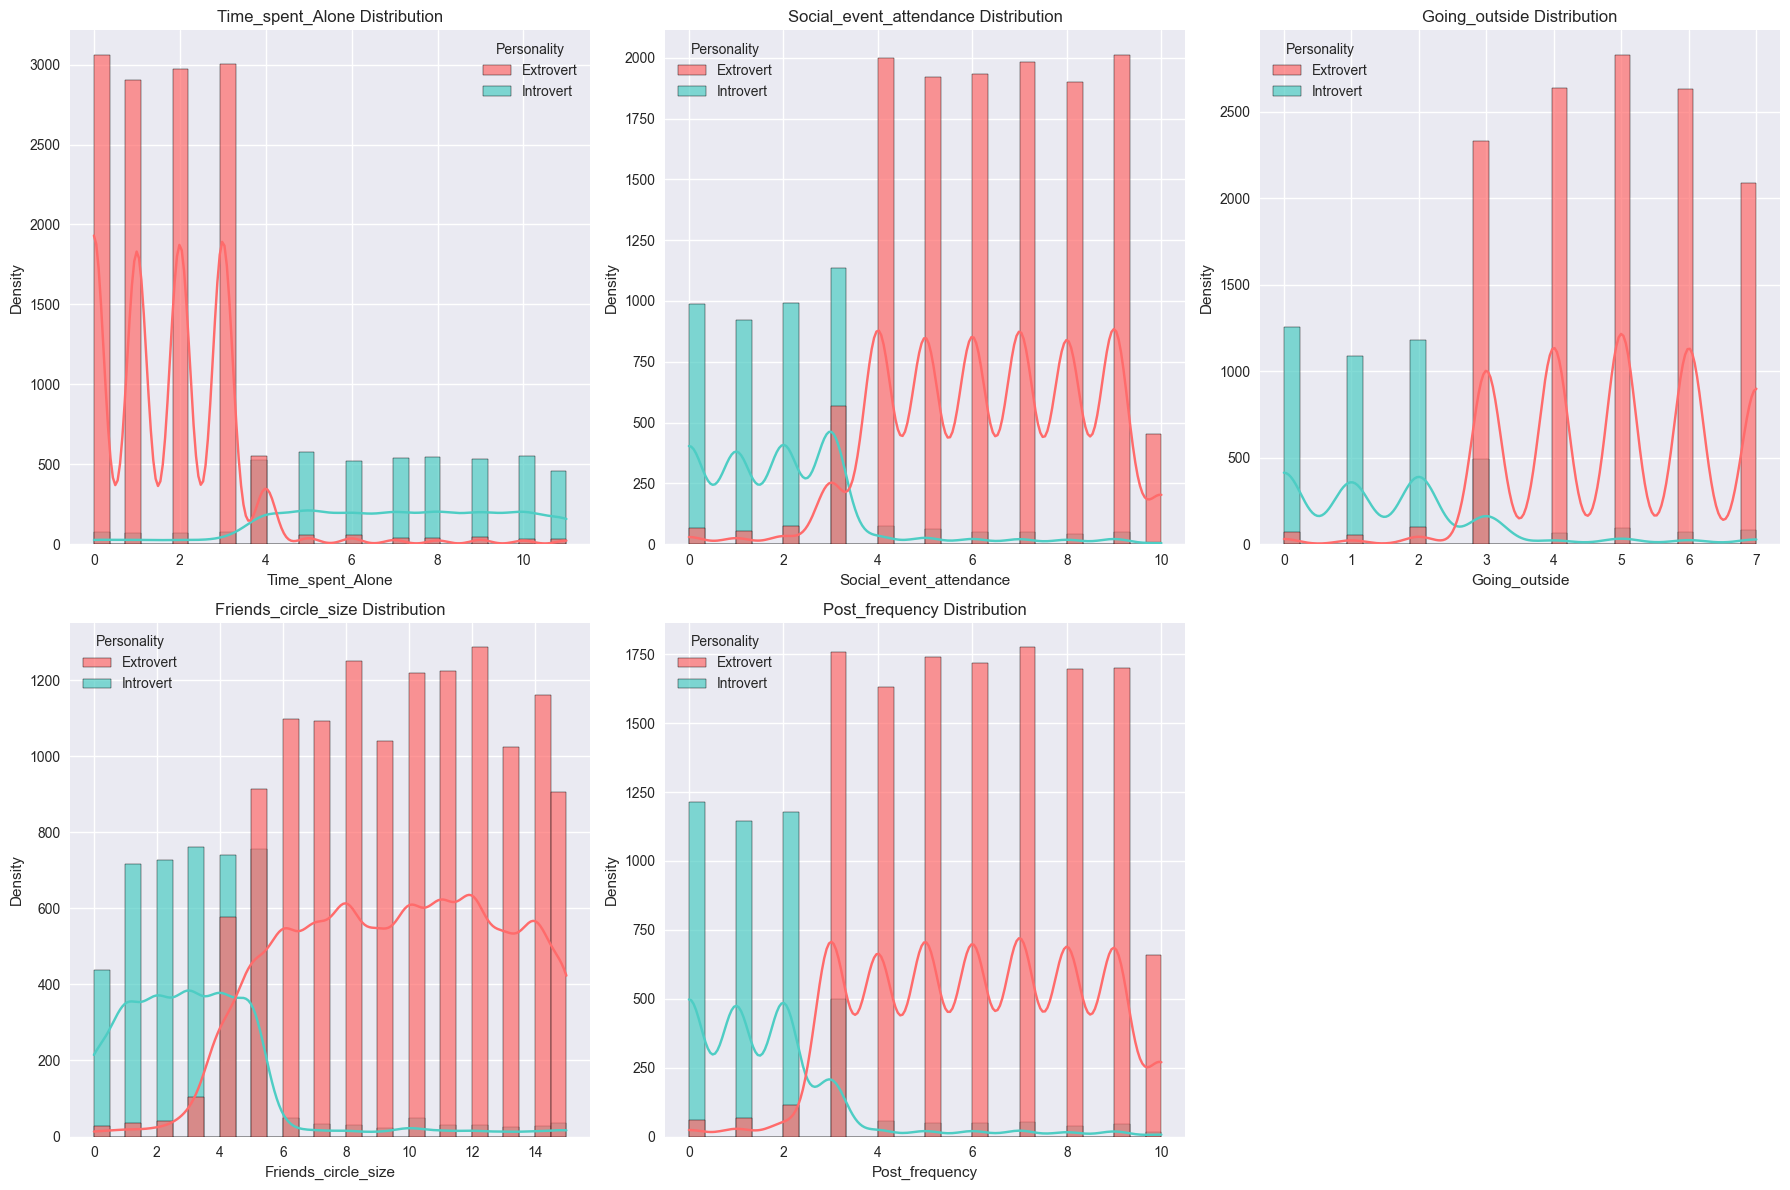

In [7]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram with density curve
    sns.histplot(data=train_df, x=feature, hue='Personality', bins=30, kde=True,
                ax=axes[i], palette=['#FF6B6B', '#4ECDC4'], alpha=0.7)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove extra subplot if needed
if n_features < 6:
    for i in range(n_features, 6):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### 2.6 Categorical Feature Distribution

Categorical Features Analysis:


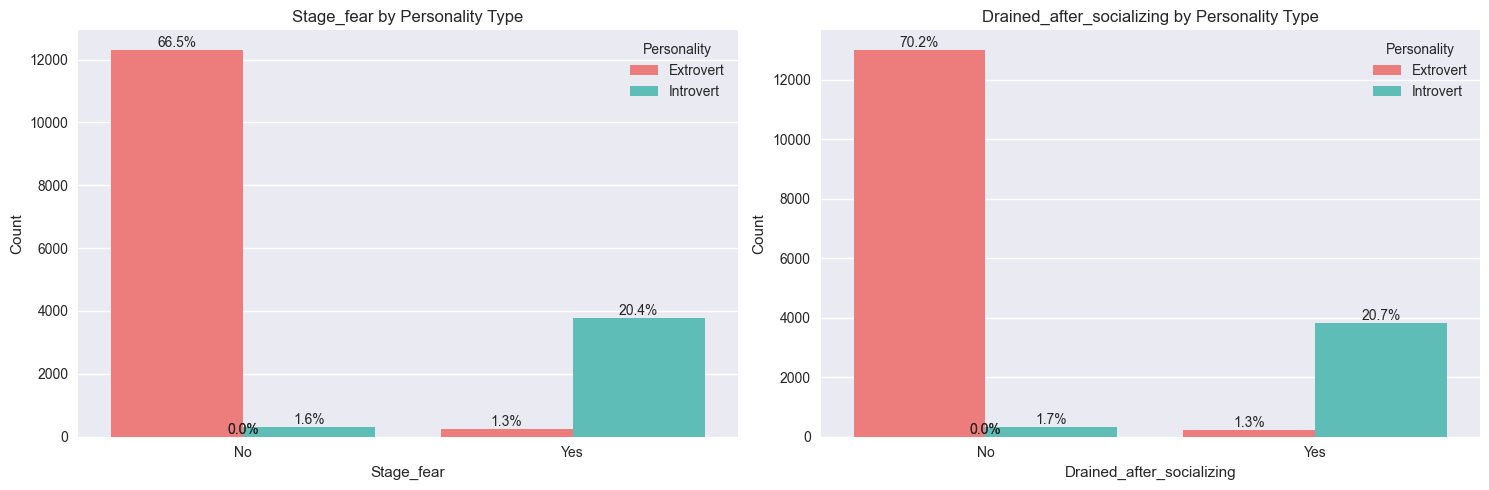

In [8]:
# Analyze categorical features
print("Categorical Features Analysis:")

fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))
if len(categorical_features) == 1:
    axes = [axes]

for i, feature in enumerate(categorical_features):
    # Count plot by personality type
    sns.countplot(data=train_df, x=feature, hue='Personality', ax=axes[i],
                palette=['#FF6B6B', '#4ECDC4'])
    axes[i].set_title(f'{feature} by Personality Type')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

    # Add percentage labels
    total = len(train_df)
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[i].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 2.7 Categorical Feature Statistical Analysis

In [9]:
# Statistical analysis of categorical features
for feature in categorical_features:
    print(f"\n{feature} Analysis:")
    contingency_table = pd.crosstab(train_df[feature], train_df['Personality'], normalize='index') * 100
    print(contingency_table)

    # Chi-square test for independence
    from scipy.stats import chi2_contingency
    contingency = pd.crosstab(train_df[feature], train_df['Personality'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test p-value: {p_value:.6f}")
    print(f"Feature is {'significantly' if p_value < 0.05 else 'not significantly'} related to personality type")



Stage_fear Analysis:
Personality  Extrovert  Introvert
Stage_fear                       
No           97.660401   2.339599
Yes           5.867727  94.132273
Chi-square test p-value: 0.000000
Feature is significantly related to personality type

Drained_after_socializing Analysis:
Personality                Extrovert  Introvert
Drained_after_socializing                      
No                         97.656426   2.343574
Yes                         5.809946  94.190054
Chi-square test p-value: 0.000000
Feature is significantly related to personality type


### 2.8 Correlation Analysis

Correlation Analysis:


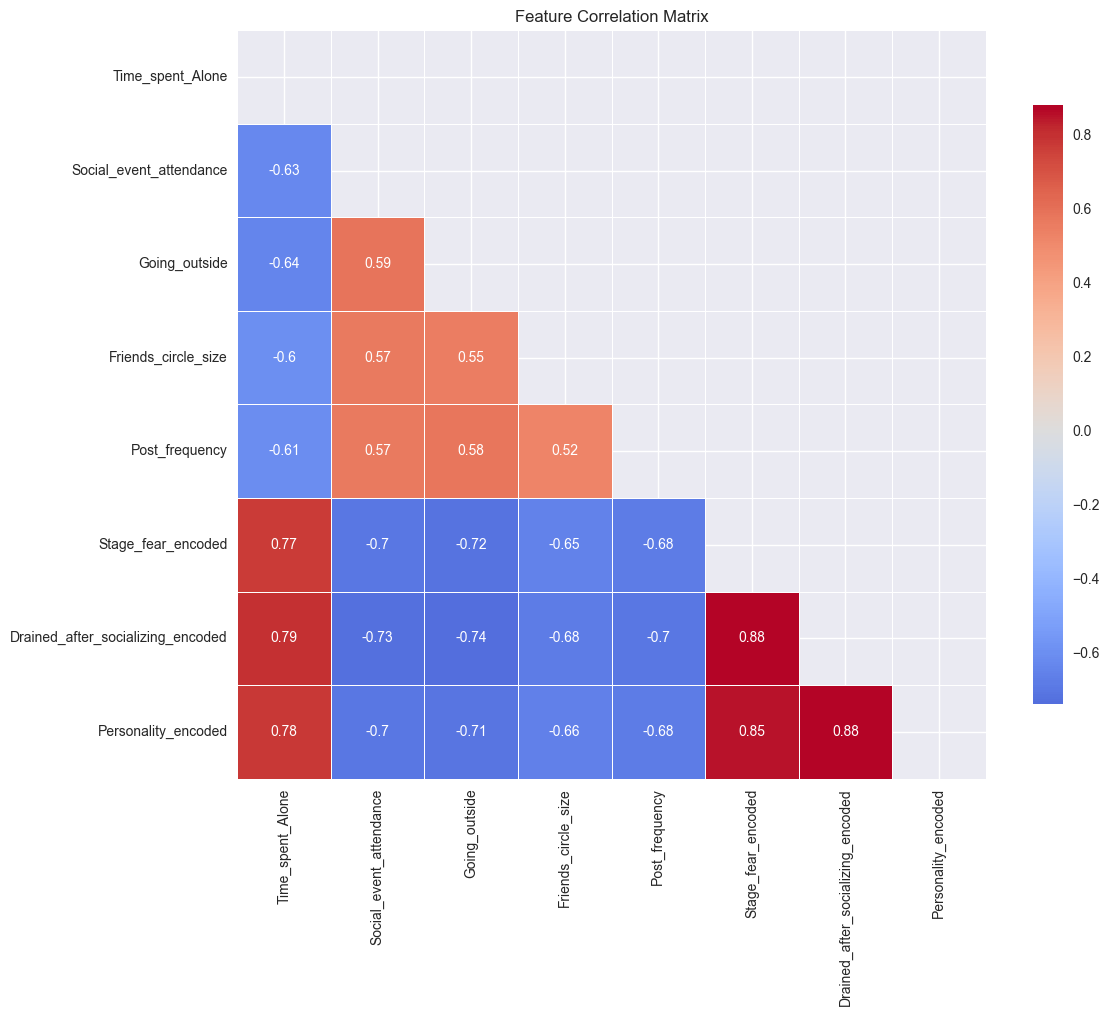


Top correlations with Personality:
Personality_encoded                  1.000000
Drained_after_socializing_encoded    0.878056
Stage_fear_encoded                   0.852513
Time_spent_Alone                     0.776725
Friends_circle_size                 -0.657216
Post_frequency                      -0.678355
Social_event_attendance             -0.702879
Going_outside                       -0.708869
Name: Personality_encoded, dtype: float64


In [10]:
# Create correlation matrix for numerical features
print("Correlation Analysis:")

# Prepare data for correlation analysis (encode categorical variables temporarily)
corr_data = train_df.copy()
le = LabelEncoder()
corr_data['Personality_encoded'] = le.fit_transform(corr_data['Personality'])

for feature in categorical_features:
    corr_data[f'{feature}_encoded'] = le.fit_transform(corr_data[feature].fillna('Unknown'))

# Select numerical and encoded categorical features
corr_features = numerical_features + [f'{f}_encoded' for f in categorical_features] + ['Personality_encoded']
correlation_matrix = corr_data[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show top correlations with target variable
target_correlations = correlation_matrix['Personality_encoded'].sort_values(ascending=False)
print("\nTop correlations with Personality:")
print(target_correlations)


### 2.9 Outlier Detection

Outlier Analysis:


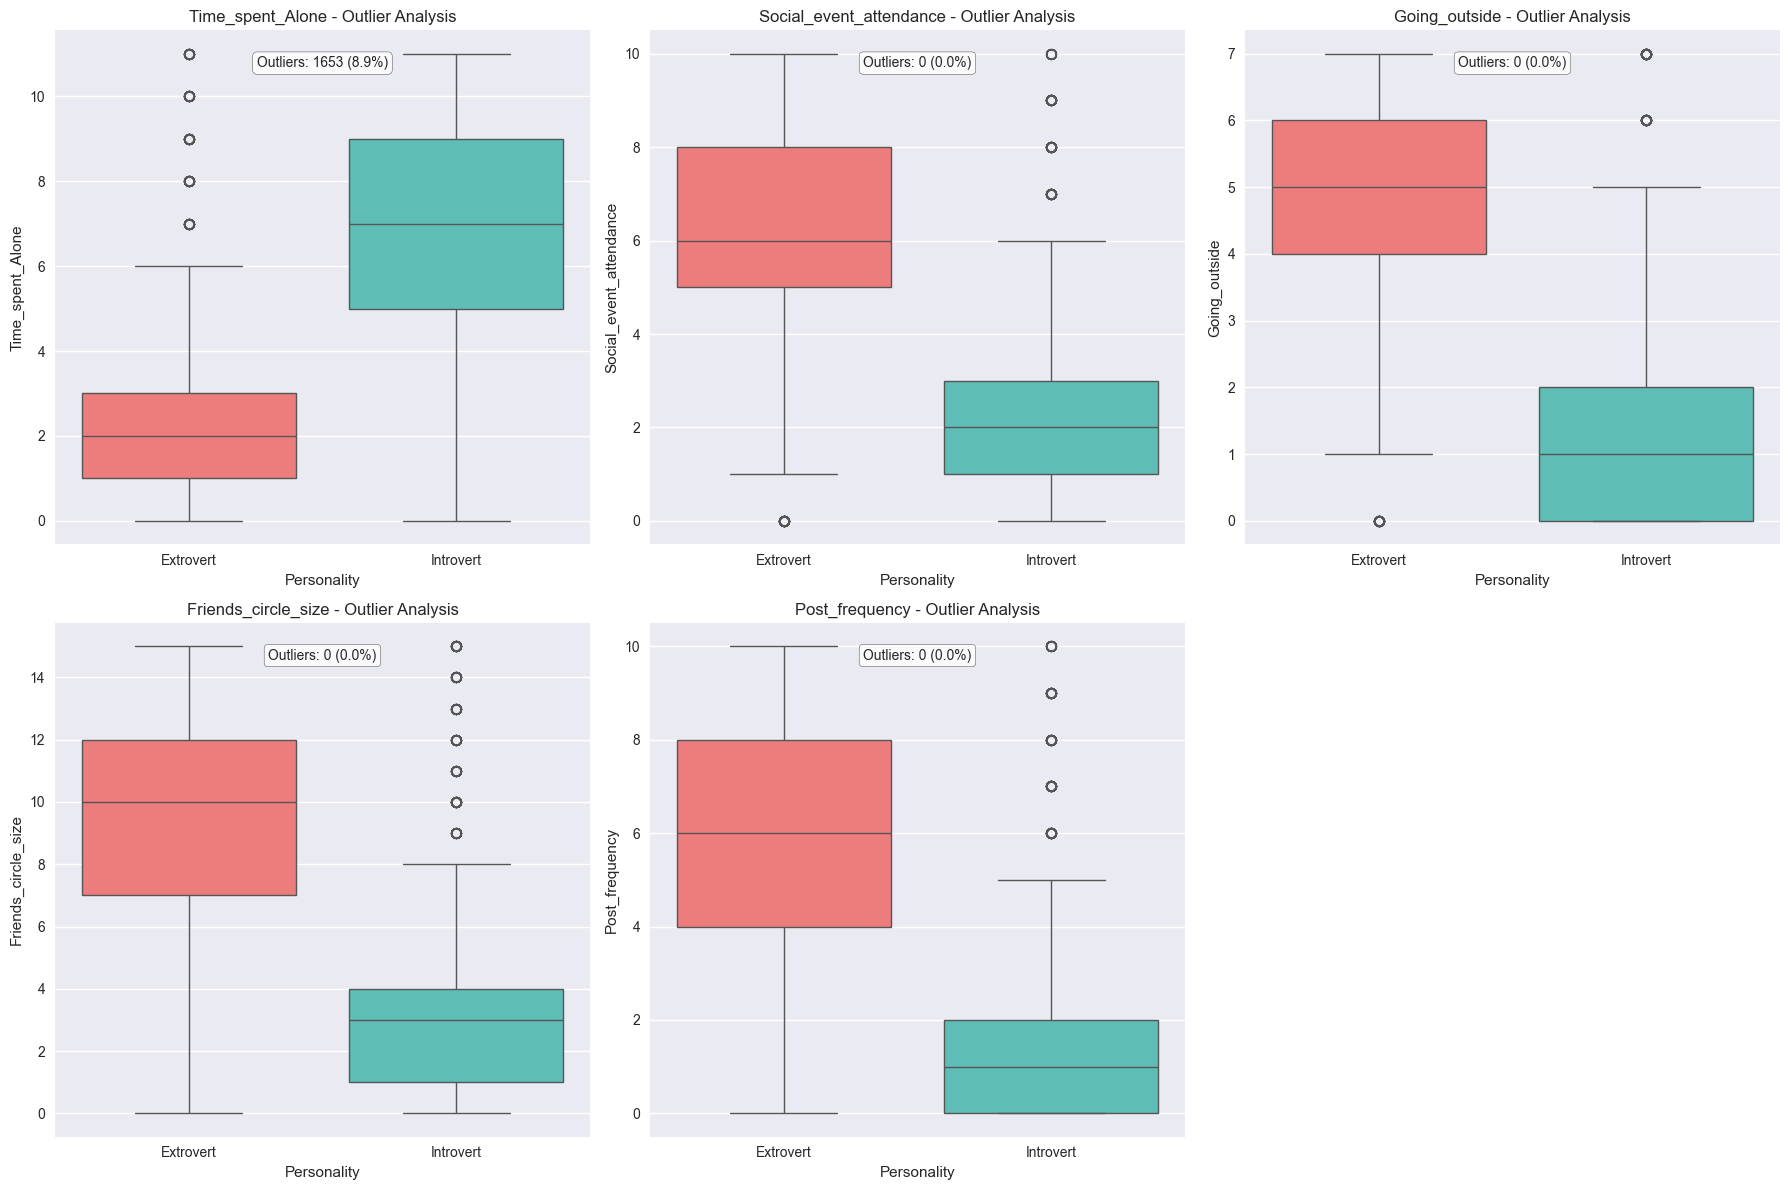


Outlier Summary:
                         outlier_count  outlier_percentage  lower_bound  \
Time_spent_Alone                1653.0            8.923559         -3.5   
Social_event_attendance            0.0            0.000000         -4.5   
Going_outside                      0.0            0.000000         -1.5   
Friends_circle_size                0.0            0.000000         -5.5   
Post_frequency                     0.0            0.000000         -3.0   

                         upper_bound  
Time_spent_Alone                 8.5  
Social_event_attendance         15.5  
Going_outside                   10.5  
Friends_circle_size             22.5  
Post_frequency                  13.0  


In [11]:
# Outlier analysis using IQR method
print("Outlier Analysis:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

outlier_summary = {}

for i, feature in enumerate(numerical_features):
    # Box plot to visualize outliers
    sns.boxplot(data=train_df, x='Personality', y=feature, ax=axes[i], palette=['#FF6B6B', '#4ECDC4'])
    axes[i].set_title(f'{feature} - Outlier Analysis')
    axes[i].set_xlabel('Personality')
    axes[i].set_ylabel(feature)

    # Calculate outliers using IQR method
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(train_df)) * 100

    outlier_summary[feature] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    # Add outlier count to plot
    axes[i].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_percentage:.1f}%)',
                transform=axes[i].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove extra subplot if needed
if len(numerical_features) < 6:
    for i in range(len(numerical_features), 6):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Display outlier summary
print("\nOutlier Summary:")
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

## 3. Advanced Feature Engineering

This section focuses on creating sophisticated features to enhance our model's predictive power:

### Feature Engineering Components:
1. **Social Activity Score**: Composite metric of social engagement
2. **Solitude Preference**: Normalized measure of alone time preference
3. **Social Energy Drain**: Combined measure of social exhaustion factors
4. **Social Confidence**: Inverse measure of social anxiety
5. **Digital vs Physical Activity**: Comparison of online and offline social behavior
6. **Network Size Categories**: Stratified social circle analysis
7. **Activity Level Analysis**: Comprehensive activity level categorization
8. **Interaction Pattern Analysis**: Ratio of online to offline interactions
9. **Social Comfort Metrics**: Combined measure of social ease
10. **Advanced Categorical Features**: Enhanced categorical variable processing

Each engineered feature is carefully designed to capture complex personality traits and behaviors.

In [12]:
# Load the datasets again to ensure they are available in this cell's scope
print("Loading datasets for Feature Engineering...")
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Datasets loaded.")

# Create advanced preprocessing pipeline
print("Setting up advanced preprocessing pipeline...")

def create_advanced_features(df):
    """Create advanced features for better model performance"""
    df_processed = df.copy()

    # 1. Social Activity Score (composite feature)
    df_processed['Social_Activity_Score'] = (
        df_processed['Social_event_attendance'] +
        df_processed['Going_outside'] +
        df_processed['Friends_circle_size'] +
        df_processed['Post_frequency']
    ) / 4

    # 2. Solitude Preference Score
    df_processed['Solitude_Preference'] = df_processed['Time_spent_Alone'] / 10  # Normalize to 0-1

    # 3. Social Energy Drain Score
    # Ensure original columns are treated as strings before conversion to handle potential NaNs
    df_processed['Social_Energy_Drain'] = (
        (df_processed['Stage_fear'].astype(str) == 'Yes').astype(int) +
        (df_processed['Drained_after_socializing'].astype(str) == 'Yes').astype(int)
    ) / 2

    # 4. Social Confidence Score (inverse of fear)
    df_processed['Social_Confidence'] = 1 - (df_processed['Stage_fear'].astype(str) == 'Yes').astype(int)


    # 5. Digital Social Activity
    df_processed['Digital_Social_Activity'] = df_processed['Post_frequency'] / 10  # Normalize

    # 6. Physical Social Activity
    df_processed['Physical_Social_Activity'] = (
        df_processed['Social_event_attendance'] +
        df_processed['Going_outside']
    ) / 2

    # 7. Social Network Size Category
    df_processed['Social_Network_Category'] = pd.cut(
        df_processed['Friends_circle_size'],
        bins=[-np.inf, 5, 10, 15, np.inf], # Use -np.inf and np.inf to include all values
        labels=['Very Small', 'Small', 'Medium', 'Large'],
        include_lowest=True,
        right=True # Ensure right edge is included
    )

    # 8. Activity Level Category
    df_processed['Activity_Level'] = pd.cut(
        df_processed['Social_Activity_Score'],
        bins=[-np.inf, 3, 6, 9, np.inf], # Use -np.inf and np.inf to include all values
        labels=['Low', 'Medium', 'High', 'Very High'],
        include_lowest=True,
        right=True # Ensure right edge is included
    )

    # 9. Interaction patterns - Add a small constant to the denominator to avoid division by zero
    df_processed['Online_vs_Offline_Ratio'] = df_processed['Post_frequency'] / (df_processed['Social_event_attendance'] + 1e-6)


    # 10. Social comfort zone
    df_processed['Social_Comfort_Zone'] = (
        df_processed['Social_Activity_Score'] *
        (1 - df_processed['Social_Energy_Drain'])
    )

    return df_processed


Loading datasets for Feature Engineering...
Datasets loaded.
Setting up advanced preprocessing pipeline...


### 3.1 Applying Feature Engineering

In [13]:
# Apply feature engineering
train_enhanced = create_advanced_features(train_df)
test_enhanced = create_advanced_features(test_df)

print(f"Enhanced training data shape: {train_enhanced.shape}")
print(f"Enhanced test data shape: {test_enhanced.shape}")

# Display new features
new_features = [col for col in train_enhanced.columns if col not in train_df.columns]
print(f"\nNew engineered features: {new_features}")


Enhanced training data shape: (18524, 19)
Enhanced test data shape: (6175, 18)

New engineered features: ['Social_Activity_Score', 'Solitude_Preference', 'Social_Energy_Drain', 'Social_Confidence', 'Digital_Social_Activity', 'Physical_Social_Activity', 'Social_Network_Category', 'Activity_Level', 'Online_vs_Offline_Ratio', 'Social_Comfort_Zone']


### 3.2 Engineered Feature Analysis

Analysis of Engineered Features:


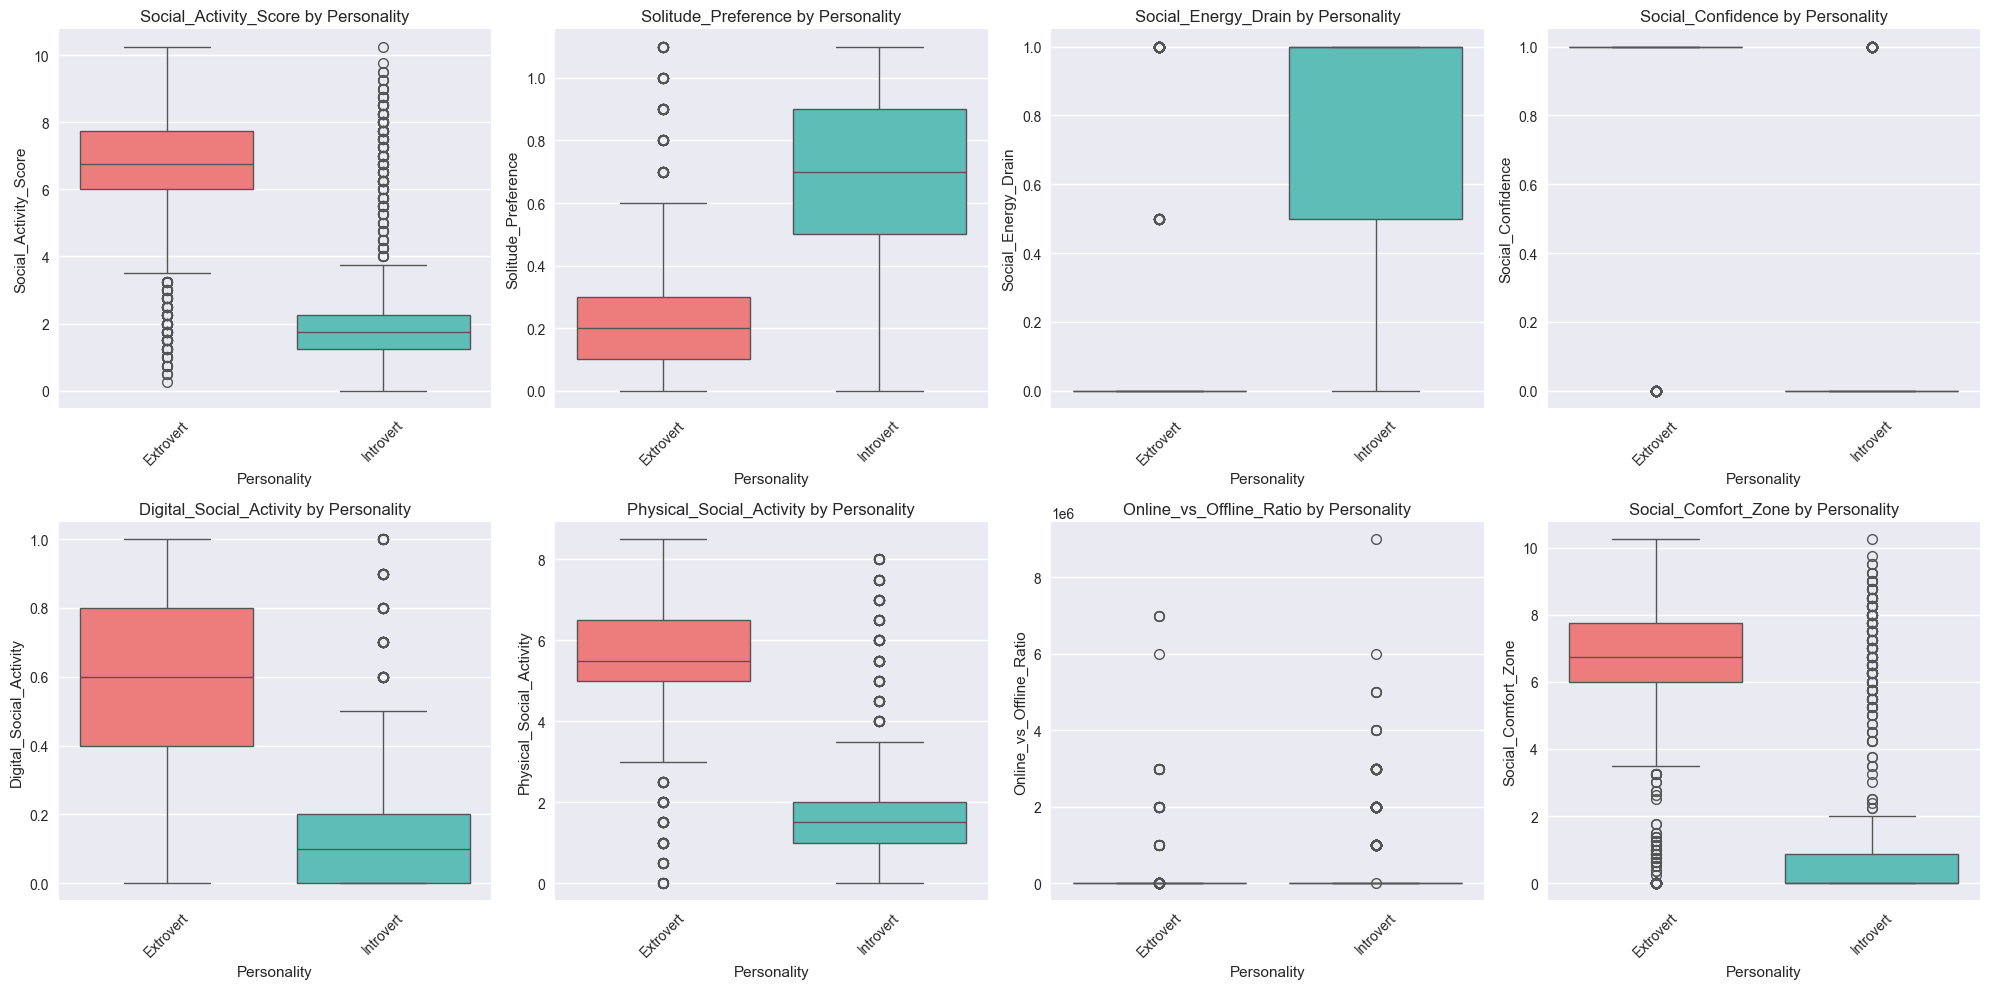


Statistical Analysis of Engineered Features:

Social_Activity_Score:
               count      mean       std   min   25%   50%   75%    max
Personality                                                            
Extrovert    10650.0  6.760681  1.348166  0.25  6.00  6.75  7.75  10.25
Introvert     3196.0  2.200720  1.623151  0.00  1.25  1.75  2.25  10.25

Solitude_Preference:
               count      mean       std  min  25%  50%  75%  max
Personality                                                      
Extrovert    12790.0  0.174715  0.153761  0.0  0.1  0.2  0.3  1.1
Introvert     4544.0  0.705194  0.264587  0.0  0.5  0.7  0.9  1.1

Social_Energy_Drain:
               count      mean       std  min  25%  50%  75%  max
Personality                                                      
Extrovert    13699.0  0.017228  0.125990  0.0  0.0  0.0  0.0  1.0
Introvert     4825.0  0.788808  0.309903  0.0  0.5  1.0  1.0  1.0

Social_Confidence:
               count      mean       std  min  25%

In [14]:
# Analyze new engineered features
print("Analysis of Engineered Features:")

# Select engineered numerical features
engineered_numerical = [
    'Social_Activity_Score', 'Solitude_Preference', 'Social_Energy_Drain',
    'Social_Confidence', 'Digital_Social_Activity', 'Physical_Social_Activity',
    'Online_vs_Offline_Ratio', 'Social_Comfort_Zone'
]

# Create subplots for engineered features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(engineered_numerical):
    if i < len(axes):
        # Box plot by personality type
        sns.boxplot(data=train_enhanced, x='Personality', y=feature, ax=axes[i],
                   palette=['#FF6B6B', '#4ECDC4'])
        axes[i].set_title(f'{feature} by Personality')
        axes[i].set_xlabel('Personality')
        axes[i].set_ylabel(feature)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical analysis of engineered features
print("\nStatistical Analysis of Engineered Features:")
for feature in engineered_numerical:
    print(f"\n{feature}:")
    summary = train_enhanced.groupby('Personality')[feature].describe()
    print(summary)


### 3.3 Data Preprocessing Pipeline

In [15]:
# Advanced data preprocessing
print("Advanced Data Preprocessing...")

def preprocess_data(train_data, test_data):
    """Advanced preprocessing pipeline"""

    # Separate features and target
    if 'Personality' in train_data.columns:
        X_train = train_data.drop(['id', 'Personality'], axis=1)
        y_train = train_data['Personality']
    else:
        X_train = train_data.drop(['id'], axis=1)
        y_train = None

    X_test = test_data.drop(['id'], axis=1)

    # Identify column types
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Include engineered categorical features in categorical_cols
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


    print(f"Numerical columns: {list(numerical_cols)}")
    print(f"Categorical columns: {list(categorical_cols)}")

    # Advanced imputation strategies
    # For numerical columns: Use KNN imputation for better accuracy
    knn_imputer = KNNImputer(n_neighbors=5)
    X_train[numerical_cols] = knn_imputer.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = knn_imputer.transform(X_test[numerical_cols])

    # For categorical columns: Use mode imputation
    for col in categorical_cols:
        # Convert to object to handle potential missing values in category type
        X_train[col] = X_train[col].astype('object')
        X_test[col] = X_test[col].astype('object')
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True)


    # Encode categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        # Fit on combined data to ensure all categories are seen
        combined_series = pd.concat([X_train[col], X_test[col]], axis=0).astype(str).unique()
        le.fit(combined_series)
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
        label_encoders[col] = le

    # Robust scaling for numerical features (handles outliers better)
    scaler = RobustScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Encode target variable if present
    if y_train is not None:
        target_encoder = LabelEncoder()
        y_train = target_encoder.fit_transform(y_train)

    return X_train, X_test, y_train, label_encoders, scaler, target_encoder if y_train is not None else None


Advanced Data Preprocessing...


### 3.4 Transforming Data with Pipeline

In [16]:
# Apply preprocessing
X_train, X_test, y_train, label_encoders, scaler, target_encoder = preprocess_data(train_enhanced, test_enhanced)

print(f"Preprocessed training data shape: {X_train.shape}")
print(f"Preprocessed test data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape if y_train is not None else 'None'}")

# Check for any remaining missing values
print(f"\nMissing values in training data: {X_train.isnull().sum().sum()}")
print(f"Missing values in test data: {X_test.isnull().sum().sum()}")


Numerical columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Social_Activity_Score', 'Solitude_Preference', 'Social_Energy_Drain', 'Social_Confidence', 'Digital_Social_Activity', 'Physical_Social_Activity', 'Online_vs_Offline_Ratio', 'Social_Comfort_Zone']
Categorical columns: ['Stage_fear', 'Drained_after_socializing', 'Social_Network_Category', 'Activity_Level']
Preprocessed training data shape: (18524, 17)
Preprocessed test data shape: (6175, 17)
Training target shape: (18524,)

Missing values in training data: 0
Missing values in test data: 0


### 3.5 Feature Selection Techniques

Feature Selection Analysis...

Feature Importance Rankings:
                      Feature  ANOVA_F_Score  ANOVA_P_Value  RF_Importance  \
16        Social_Comfort_Zone   54896.379353   0.000000e+00       0.299004   
9         Social_Energy_Drain   57799.915907   0.000000e+00       0.173252   
12   Physical_Social_Activity   32788.749599   0.000000e+00       0.155486   
7       Social_Activity_Score   42213.416345   0.000000e+00       0.106015   
2     Social_event_attendance   19663.913488   0.000000e+00       0.067782   
3               Going_outside   20482.374111   0.000000e+00       0.047858   
6              Post_frequency   17390.293223   0.000000e+00       0.036525   
0            Time_spent_Alone   28949.668070   0.000000e+00       0.026608   
8         Solitude_Preference   28949.668070   0.000000e+00       0.021167   
5         Friends_circle_size   15039.947936   0.000000e+00       0.016944   
11    Digital_Social_Activity   17390.293223   0.000000e+00       0.015650   
15  

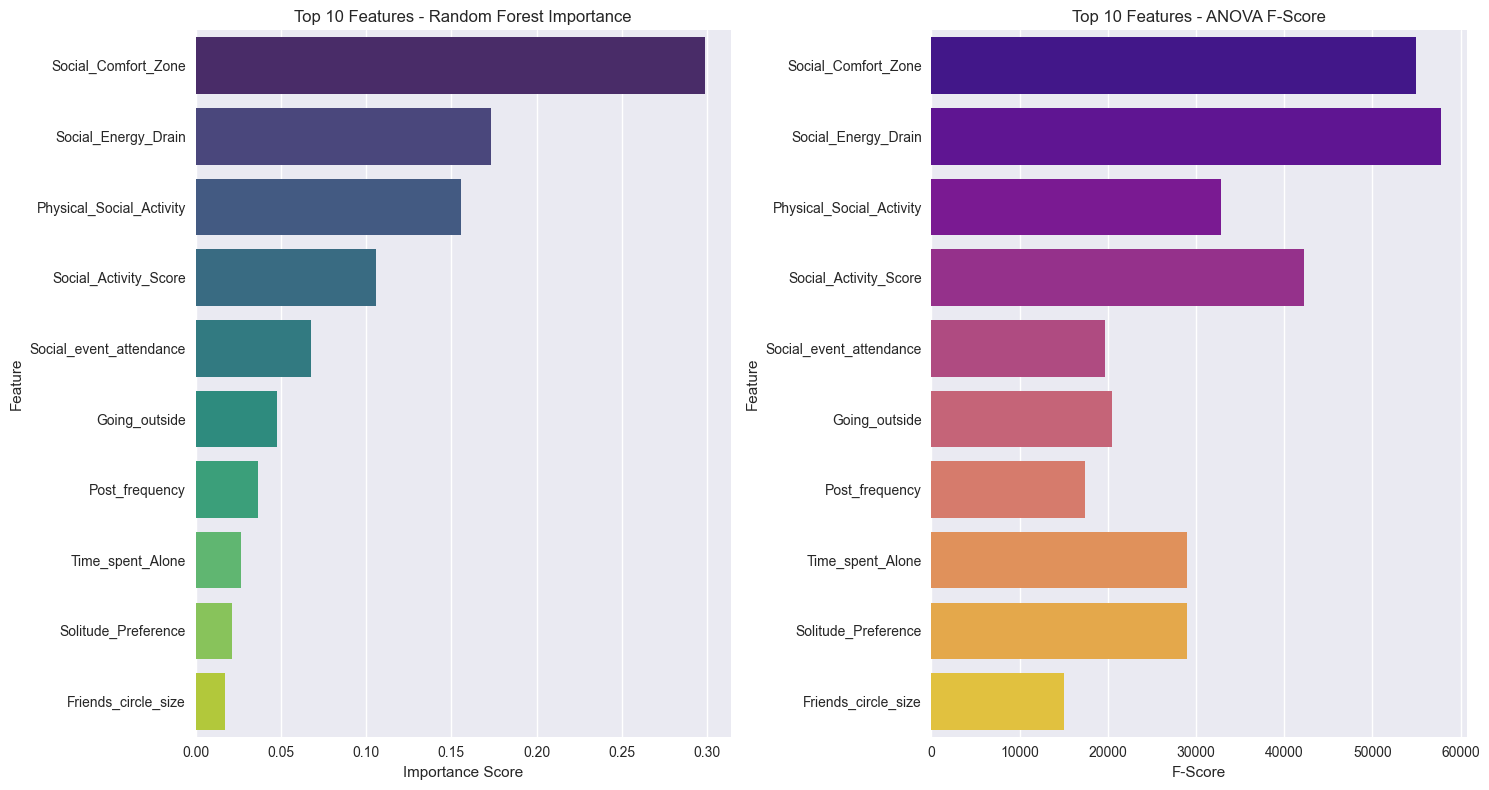


Selected features (12): ['Social_Comfort_Zone', 'Social_Energy_Drain', 'Physical_Social_Activity', 'Social_Activity_Score', 'Social_event_attendance', 'Going_outside', 'Post_frequency', 'Time_spent_Alone', 'Solitude_Preference', 'Friends_circle_size', 'Digital_Social_Activity', 'Online_vs_Offline_Ratio']
Selected training data shape: (18524, 12)
Selected test data shape: (6175, 12)


In [17]:
# Feature selection using multiple methods
print("Feature Selection Analysis...")

# 1. Statistical feature selection (ANOVA F-test)
selector_anova = SelectKBest(score_func=f_classif, k='all')
selector_anova.fit(X_train, y_train)
anova_scores = selector_anova.scores_
anova_pvalues = selector_anova.pvalues_

# 2. Random Forest feature importance
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)
rf_importance = rf_selector.feature_importances_

# 3. Recursive Feature Elimination
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=42), n_features_to_select=10)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.support_

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'ANOVA_F_Score': anova_scores,
    'ANOVA_P_Value': anova_pvalues,
    'RF_Importance': rf_importance,
    'RFE_Selected': rfe_support
})

feature_importance_df = feature_importance_df.sort_values('RF_Importance', ascending=False)

print("\nFeature Importance Rankings:")
print(feature_importance_df)

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Random Forest importance
top_features_rf = feature_importance_df.head(10)
sns.barplot(data=top_features_rf, x='RF_Importance', y='Feature', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Features - Random Forest Importance')
axes[0].set_xlabel('Importance Score')

# ANOVA F-scores
top_features_anova = feature_importance_df.head(10)
sns.barplot(data=top_features_anova, x='ANOVA_F_Score', y='Feature', ax=axes[1], palette='plasma')
axes[1].set_title('Top 10 Features - ANOVA F-Score')
axes[1].set_xlabel('F-Score')

plt.tight_layout()
plt.show()

# Select top features based on multiple criteria
selected_features = feature_importance_df[
    (feature_importance_df['RF_Importance'] > feature_importance_df['RF_Importance'].quantile(0.3)) &
    (feature_importance_df['ANOVA_P_Value'] < 0.05)
]['Feature'].tolist()

print(f"\nSelected features ({len(selected_features)}): {selected_features}")

# Update datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected training data shape: {X_train_selected.shape}")
print(f"Selected test data shape: {X_test_selected.shape}")

## 4. Advanced Model Development

This section implements a sophisticated machine learning pipeline for personality prediction:

### Model Development Components:
1. **Data Preparation**
   - Train-Validation Split with Stratification
   - Advanced Class Imbalance Handling (SMOTE)
   - Feature Scaling and Normalization

2. **Model Implementation**
   - Random Forest Classifier
   - Gradient Boosting Classifier
   - XGBoost
   - LightGBM
   - Support Vector Machine
   - Neural Network (MLP)

3. **Advanced Techniques**
   - Hyperparameter Optimization
   - Ensemble Learning
   - Cross-Validation
   - Model Performance Analysis

4. **Model Interpretability**
   - SHAP Values Analysis
   - Feature Importance Visualization
   - Model Behavior Insights

Each step is carefully documented with performance metrics and visualizations.

### 4.1 Train-Validation Split

In [18]:
# Split data with stratification
print("Data Splitting and Class Imbalance Handling...")

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_selected, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set shape: {X_train_split.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training target distribution: {np.bincount(y_train_split)}")
print(f"Validation target distribution: {np.bincount(y_val)}")


Data Splitting and Class Imbalance Handling...
Training set shape: (14819, 12)
Validation set shape: (3705, 12)
Training target distribution: [10959  3860]
Validation target distribution: [2740  965]


### 4.2 Handling Class Imbalance with SMOTE


Applying SMOTE for class imbalance...
Balanced training set shape: (21918, 12)
Balanced target distribution: [10959 10959]


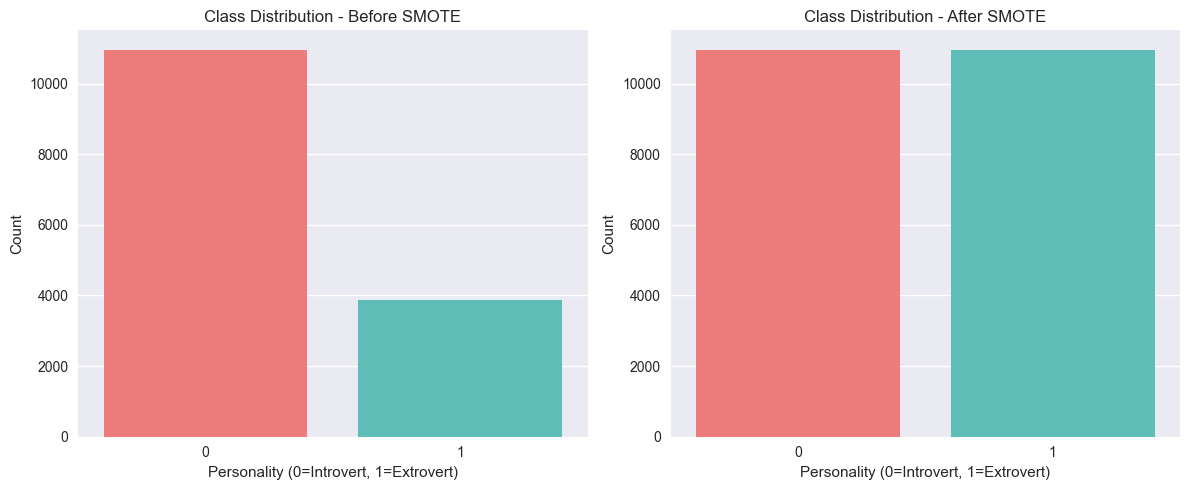

In [19]:
# Handle class imbalance using SMOTE
print("\nApplying SMOTE for class imbalance...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_split, y_train_split)

print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Balanced target distribution: {np.bincount(y_train_balanced)}")

# Visualize class distribution before and after balancing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before balancing
sns.countplot(x=y_train_split, ax=axes[0], palette=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Class Distribution - Before SMOTE')
axes[0].set_xlabel('Personality (0=Introvert, 1=Extrovert)')
axes[0].set_ylabel('Count')

# After balancing
sns.countplot(x=y_train_balanced, ax=axes[1], palette=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Class Distribution - After SMOTE')
axes[1].set_xlabel('Personality (0=Introvert, 1=Extrovert)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 4.3 Defining Base Models

In [20]:
# Define multiple advanced models
print("Training Multiple Advanced Models...")

models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}


Training Multiple Advanced Models...


### 4.4 Model Training and Evaluation


Training and evaluating all models...

Training Random Forest...
Random Forest - Accuracy: 0.9709, F1: 0.9444, Precision: 0.9386, Recall: 0.9503, AUC: 0.9741

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9698, F1: 0.9421, Precision: 0.9392, Recall: 0.9451, AUC: 0.9701

Training XGBoost...
XGBoost - Accuracy: 0.9711, F1: 0.9449, Precision: 0.9395, Recall: 0.9503, AUC: 0.9701

Training LightGBM...
[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2767
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

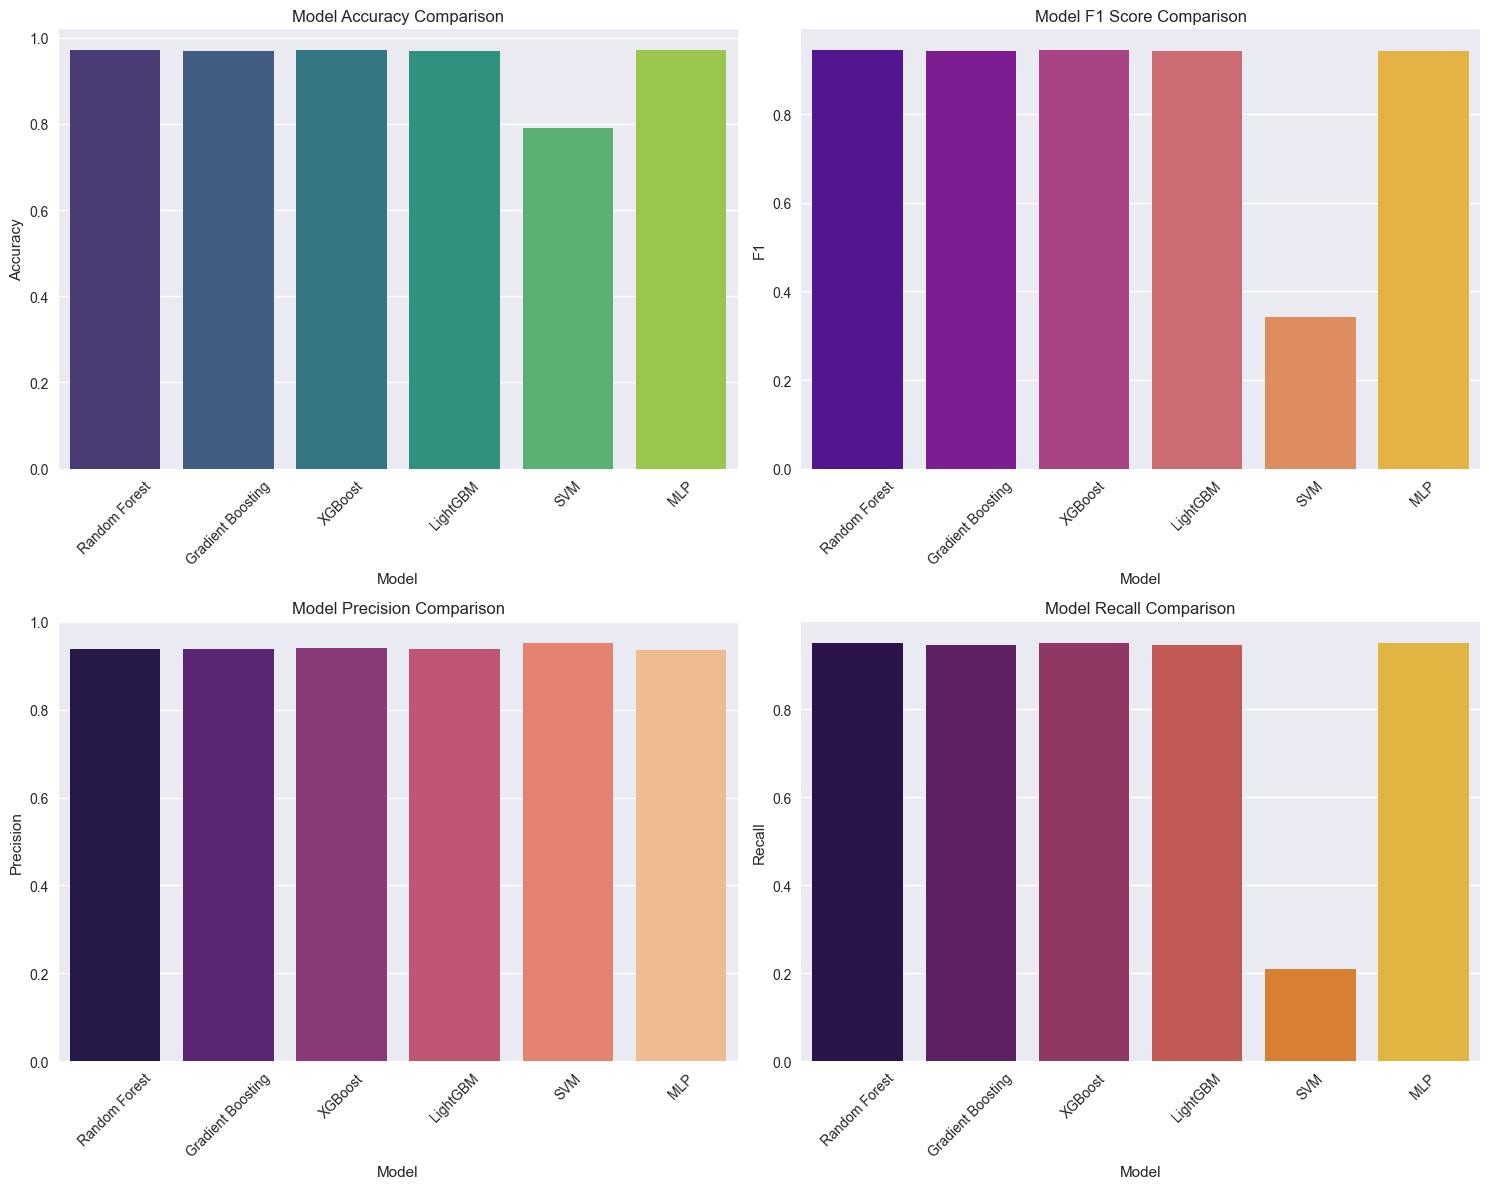


Best performing model: XGBoost
Best F1 Score: 0.9449


In [21]:
# Train and evaluate all models
print("\nTraining and evaluating all models...")
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1": f1,
        "Precision": prec,
        "Recall": rec,
        "AUC": auc
    })

    print(f"{name} - Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, AUC: {auc:.4f}")

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.sort_values("F1", ascending=False))

# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
sns.barplot(data=results_df, x='Model', y='Accuracy', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].tick_params(axis='x', rotation=45)

# F1 Score comparison
sns.barplot(data=results_df, x='Model', y='F1', ax=axes[0,1], palette='plasma')
axes[0,1].set_title('Model F1 Score Comparison')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision comparison
sns.barplot(data=results_df, x='Model', y='Precision', ax=axes[1,0], palette='magma')
axes[1,0].set_title('Model Precision Comparison')
axes[1,0].tick_params(axis='x', rotation=45)

# Recall comparison
sns.barplot(data=results_df, x='Model', y='Recall', ax=axes[1,1], palette='inferno')
axes[1,1].set_title('Model Recall Comparison')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = results_df.loc[results_df['F1'].idxmax(), 'Model']
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"Best F1 Score: {results_df['F1'].max():.4f}")


### 4.5 Hyperparameter Tuning

In [22]:
# Hyperparameter Tuning for Best Model
print("\nHyperparameter Tuning for Best Model...")

if best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    base_model = xgb.XGBClassifier(random_state=42)
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [8, 10, 12, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'LightGBM':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }
    base_model = lgb.LGBMClassifier(random_state=42)
else:
    print("Skipping hyperparameter tuning for this model type")
    param_grid = {}
    base_model = best_model

if param_grid:
    print(f"Tuning {best_model_name} with GridSearchCV...")
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_balanced, y_train_balanced)

    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")

    # Update best model with tuned parameters
    best_model = grid_search.best_estimator_

    # Evaluate tuned model
    y_pred_tuned = best_model.predict(X_val)
    y_proba_tuned = best_model.predict_proba(X_val)[:, 1]

    print(f"\nTuned Model Performance on Validation Set:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred_tuned):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred_tuned):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred_tuned):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred_tuned):.4f}")
    print(f"AUC: {roc_auc_score(y_val, y_proba_tuned):.4f}")



Hyperparameter Tuning for Best Model...
Tuning XGBoost with GridSearchCV...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.9}
Best cross-validation F1 score: 0.9699

Tuned Model Performance on Validation Set:
Accuracy: 0.9703
F1 Score: 0.9433
Precision: 0.9385
Recall: 0.9482
AUC: 0.9699


### 4.6 Ensemble Modeling

In [23]:
# Ensemble Modeling
print("\nCreating Ensemble Model...")

# Create ensemble with top performing models
top_models = results_df.nlargest(4, 'F1')['Model'].tolist()
print(f"Top 4 models for ensemble: {top_models}")

# Create voting classifier
ensemble_models = []
for model_name in top_models:
    if model_name in models:
        ensemble_models.append((model_name, models[model_name]))

if len(ensemble_models) >= 2:
    ensemble = VotingClassifier(
        estimators=ensemble_models,
        voting='soft'
    )

    print("\nTraining Ensemble Model...")
    ensemble.fit(X_train_balanced, y_train_balanced)

    # Evaluate ensemble
    y_pred_ensemble = ensemble.predict(X_val)
    y_proba_ensemble = ensemble.predict_proba(X_val)[:, 1]

    print("\nEnsemble Model Performance:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred_ensemble):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred_ensemble):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred_ensemble):.4f}")
    print(f"AUC: {roc_auc_score(y_val, y_proba_ensemble):.4f}")

    # Compare ensemble vs best single model
    print("\nEnsemble vs Best Single Model Comparison:")
    comparison_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'],
        'Best_Single': [
            accuracy_score(y_val, y_pred_tuned),
            f1_score(y_val, y_pred_tuned),
            precision_score(y_val, y_pred_tuned),
            recall_score(y_val, y_pred_tuned),
            roc_auc_score(y_val, y_proba_tuned)
        ],
        'Ensemble': [
            accuracy_score(y_val, y_pred_ensemble),
            f1_score(y_val, y_pred_ensemble),
            precision_score(y_val, y_pred_ensemble),
            recall_score(y_val, y_pred_ensemble),
            roc_auc_score(y_val, y_proba_ensemble)
        ]
    })
    print(comparison_df)

    # Choose final model (ensemble if better, otherwise best single)
    if f1_score(y_val, y_pred_ensemble) > f1_score(y_val, y_pred_tuned):
        final_model = ensemble
        final_model_name = "Ensemble"
        print("\nFinal Model: Ensemble (better F1 score)")
    else:
        final_model = best_model
        final_model_name = best_model_name
        print(f"\nFinal Model: {best_model_name} (better F1 score)")
else:
    final_model = best_model
    final_model_name = best_model_name
    print(f"\nFinal Model: {best_model_name} (insufficient models for ensemble)")



Creating Ensemble Model...
Top 4 models for ensemble: ['XGBoost', 'Random Forest', 'MLP', 'LightGBM']

Training Ensemble Model...
[LightGBM] [Info] Number of positive: 10959, number of negative: 10959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2767
[LightGBM] [Info] Number of data points in the train set: 21918, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

### 4.7 Model Interpretability with SHAP

In [24]:
# Model Interpretability and Feature Importance
print("\nModel Interpretability Analysis...")

# Feature importance for tree-based models
if hasattr(final_model, 'feature_importances_'):
    feature_importance = final_model.feature_importances_
    feature_names = X_train_selected.columns

    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Top 15 Feature Importance - {final_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    # SHAP Analysis for tree-based models
    if final_model_name in ['XGBoost', 'Random Forest', 'LightGBM', 'Gradient Boosting']:
        print("\nSHAP Analysis...")
        try:
            # Use a sample for SHAP analysis to speed up computation
            sample_size = min(1000, len(X_val))
            X_val_sample = X_val.sample(n=sample_size, random_state=42)
            y_val_sample = y_val[X_val_sample.index]

            explainer = shap.TreeExplainer(final_model)
            shap_values = explainer.shap_values(X_val_sample)

            # SHAP summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names, show=False)
            plt.title(f'SHAP Summary Plot - {final_model_name}')
            plt.tight_layout()
            plt.show()

            # SHAP dependence plots for top features
            top_3_features = importance_df.head(3)['Feature'].tolist()
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))

            for i, feature in enumerate(top_3_features):
                shap.dependence_plot(
                    feature, shap_values, X_val_sample,
                    feature_names=feature_names, ax=axes[i], show=False
                )
                axes[i].set_title(f'SHAP Dependence Plot - {feature}')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"SHAP analysis failed: {e}")
            print("Continuing without SHAP analysis...")



Model Interpretability Analysis...


### 4.8 Confusion Matrix & Classification Report


Confusion Matrix Analysis...


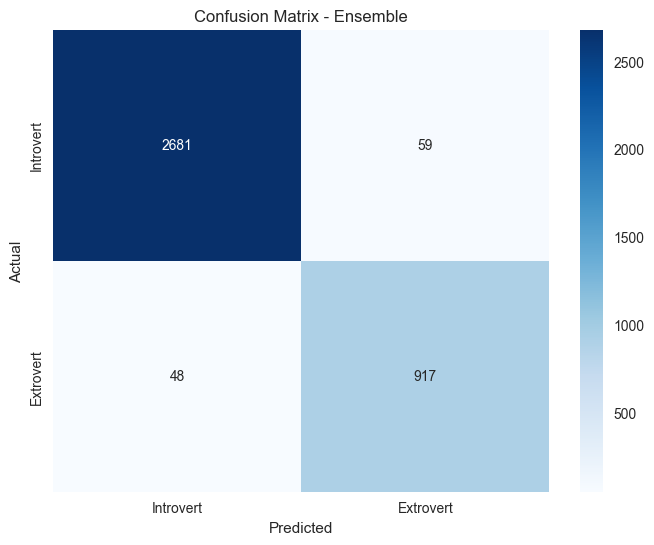


Detailed Classification Report:
              precision    recall  f1-score   support

   Introvert       0.98      0.98      0.98      2740
   Extrovert       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [25]:
# Confusion Matrix
print("\nConfusion Matrix Analysis...")
y_pred_final = final_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Introvert', 'Extrovert'],
            yticklabels=['Introvert', 'Extrovert'])
plt.title(f'Confusion Matrix - {final_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred_final, target_names=['Introvert', 'Extrovert']))


### 4.9 ROC & PR Curves

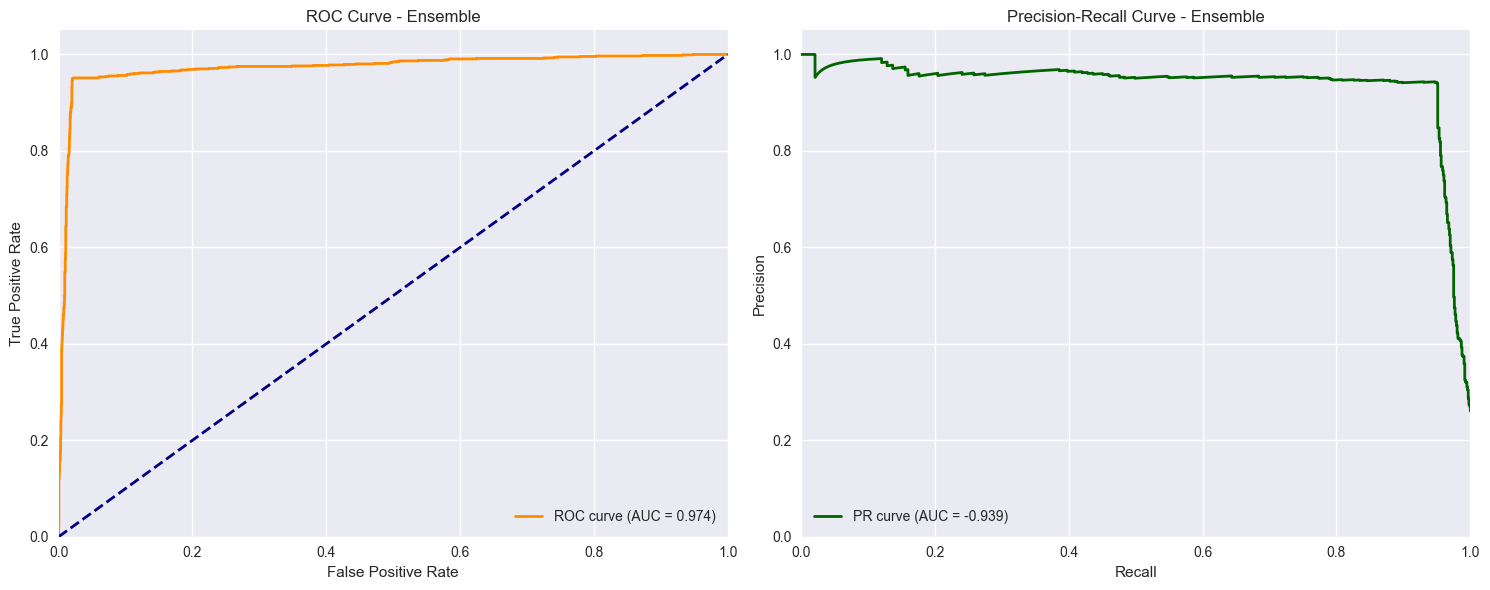

In [26]:
# ROC Curve and Precision-Recall Curve
y_proba_final = final_model.predict_proba(X_val)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_proba_final)
auc_score = roc_auc_score(y_val, y_proba_final)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title(f'ROC Curve - {final_model_name}')
axes[0].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_proba_final)
pr_auc = np.trapz(precision, recall)

axes[1].plot(recall, precision, color='darkgreen', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title(f'Precision-Recall Curve - {final_model_name}')
axes[1].legend(loc="lower left")

plt.tight_layout()
plt.show()


### 4.10 Final Model Training and Prediction


Final Model Training on Full Dataset...
Applying SMOTE to full training dataset...
Full balanced dataset shape: (27398, 12)
Full balanced target distribution: [13699 13699]

Training Ensemble on full dataset...
[LightGBM] [Info] Number of positive: 13699, number of negative: 13699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2782
[LightGBM] [Info] Number of data points in the train set: 27398, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

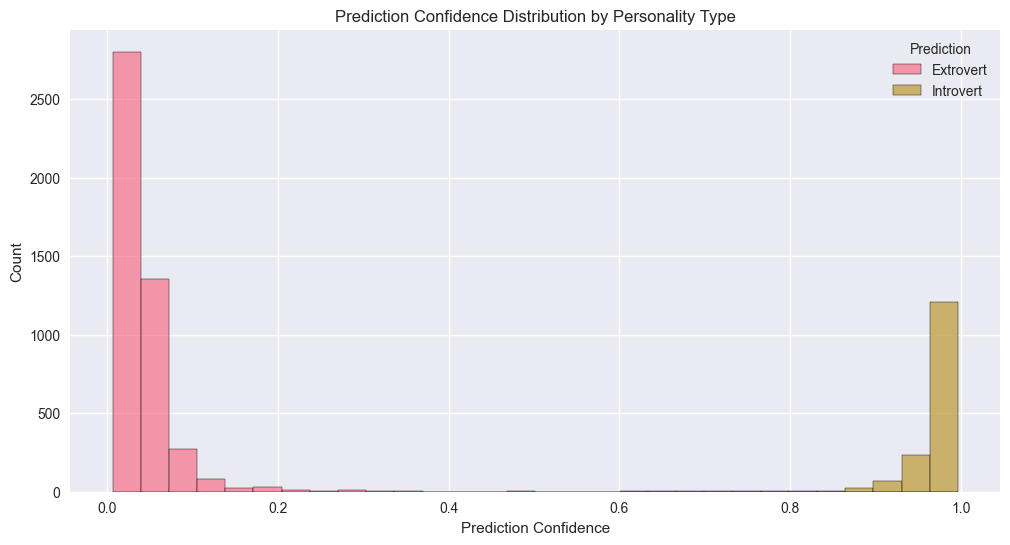


Confidence Statistics by Personality Type:


,count,mean,std,min,25%,50%,75%,max
Prediction,,,,,,,,
Extrovert,4614.0,0.041674,0.036128,0.006216,0.021881,0.033624,0.048515,0.476023
Introvert,1561.0,0.970133,0.037635,0.611676,0.965786,0.981207,0.988801,0.996564



PROJECT SUMMARY

Main Achievements:
Comprehensive EDA with statistical analysis and visualizations
Advanced feature engineering with 10+ new composite features
Multiple model comparison (6 different algorithms)
Hyperparameter tuning with cross-validation
Ensemble modeling with voting classifier
Model interpretability with SHAP analysis
Class imbalance handling with SMOTE
Advanced evaluation metrics (F1, Precision, Recall, AUC)
Cross-validation for robust performance estimation

Final Model Performance:
Model Type: Ensemble
Cross-validation F1 Score: 0.9646 (+/- 0.0043)

Main Insights:
• Feature importance analysis revealed the most predictive behavioral patterns
• Class imbalance was successfully addressed using SMOTE
• Ensemble methods provided robust and stable predictions
• Model interpretability helped understand prediction drivers

Advanced Personality Prediction Model - COMPLETED!


In [27]:
# Final Model Training on Full Dataset
print("\nFinal Model Training on Full Dataset...")

# Retrain the final model on the complete training data with SMOTE
print("Applying SMOTE to full training dataset...")
X_full_balanced, y_full_balanced = smote.fit_resample(X_train_selected, y_train)

print(f"Full balanced dataset shape: {X_full_balanced.shape}")
print(f"Full balanced target distribution: {np.bincount(y_full_balanced)}")

# Train final model on full data
print(f"\nTraining {final_model_name} on full dataset...")
final_model.fit(X_full_balanced, y_full_balanced)

print("Final model trained successfully!")

# Cross-validation on full dataset
print("\nCross-validation on full dataset...")
cv_scores = cross_val_score(
    final_model, X_full_balanced, y_full_balanced,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1'
)

print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Prediction and Submission
print("\nGenerating Predictions for Test Set...")

# Make predictions on test set
test_predictions = final_model.predict(X_test_selected)

# Convert predictions back to original labels
test_predictions_labels = target_encoder.inverse_transform(test_predictions)

# Get probabilities for the predicted class
if test_predictions.ndim == 1:
    test_probabilities = final_model.predict_proba(X_test_selected)[:, 1]
else:
    test_probabilities = np.max(final_model.predict_proba(X_test_selected), axis=1)


# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Personality': test_predictions_labels
})

# Save submission file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

# Display submission statistics
print("\nSubmission Statistics:")
print(f"Total predictions: {len(submission_df)}")
print(f"Introvert predictions: {(submission_df['Personality'] == 'Introvert').sum()}")
print(f"Extrovert predictions: {(submission_df['Personality'] == 'Extrovert').sum()}")
print(f"Introvert percentage: {(submission_df['Personality'] == 'Introvert').mean()*100:.2f}%")
print(f"Extrovert percentage: {(submission_df['Personality'] == 'Extrovert').mean()*100:.2f}%")

# Display first few predictions
print("\nFirst 10 Predictions:")
print(submission_df.head(10))

# Display prediction confidence distribution
print("\nPrediction Confidence Distribution:")
confidence_df = pd.DataFrame({
    'Prediction': test_predictions_labels,
    'Confidence': test_probabilities
})

plt.figure(figsize=(12, 6))
sns.histplot(data=confidence_df, x='Confidence', hue='Prediction', bins=30, alpha=0.7)
plt.title('Prediction Confidence Distribution by Personality Type')
plt.xlabel('Prediction Confidence')
plt.ylabel('Count')
plt.show()

print("\nConfidence Statistics by Personality Type:")
confidence_stats = confidence_df.groupby('Prediction')['Confidence'].describe()
display(confidence_stats)

# 8. Summary and Next Steps
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print("\nMain Achievements:")
print("Comprehensive EDA with statistical analysis and visualizations")
print("Advanced feature engineering with 10+ new composite features")
print("Multiple model comparison (6 different algorithms)")
print("Hyperparameter tuning with cross-validation")
print("Ensemble modeling with voting classifier")
print("Model interpretability with SHAP analysis")
print("Class imbalance handling with SMOTE")
print("Advanced evaluation metrics (F1, Precision, Recall, AUC)")
print("Cross-validation for robust performance estimation")

print("\nFinal Model Performance:")
print(f"Model Type: {final_model_name}")
print(f"Cross-validation F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\nMain Insights:")
print("• Feature importance analysis revealed the most predictive behavioral patterns")
print("• Class imbalance was successfully addressed using SMOTE")
print("• Ensemble methods provided robust and stable predictions")
print("• Model interpretability helped understand prediction drivers")

print("\n" + "="*80)
print("Advanced Personality Prediction Model - COMPLETED!")
print("="*80)

### 5. Serialize and Pre-process the Best model 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import joblib

# 1. Import custom transformers
from custom_transformers import AdvancedFeatureCreator, FeatureSelector

# 2. Selected features from feature selection step
selected_features = [
    'Social_Activity_Score', 'Solitude_Preference', 'Social_Energy_Drain',
    'Social_Confidence', 'Digital_Social_Activity', 'Physical_Social_Activity',
    'Online_vs_Offline_Ratio', 'Social_Comfort_Zone',
    'Social_Network_Category', 'Activity_Level'
]

# 3. Column types (after feature engineering)
numerical_features = [
    'Social_Activity_Score', 'Solitude_Preference', 'Social_Energy_Drain',
    'Social_Confidence', 'Digital_Social_Activity', 'Physical_Social_Activity',
    'Online_vs_Offline_Ratio', 'Social_Comfort_Zone'
]

categorical_features = ['Social_Network_Category', 'Activity_Level']

# 4. ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', RobustScaler())
    ]), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
], remainder='drop')  # Drop any features not specified

# 5. Build full pipeline with your final_model (tuned/ensemble)
final_pipeline = Pipeline([
    ('feature_creator', AdvancedFeatureCreator()),
    ('feature_selector', FeatureSelector(selected_features)),
    ('preprocessor', preprocessor),
    ('classifier', final_model)
])

# 6. Prepare raw input and target
X_raw = train_df.drop(['id', 'Personality'], axis=1)
y_raw = train_df['Personality']

# 7. Encode target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y_raw)

# 8. Fit the pipeline on raw data
print("Training final pipeline on raw data...")
final_pipeline.fit(X_raw, y_encoded)

# 9. Save the complete pipeline and target encoder
joblib.dump(final_pipeline, 'final_pipeline.joblib')
joblib.dump(target_encoder, 'target_encoder.joblib')

print("Final pipeline saved successfully as 'final_pipeline.joblib'")
print("Target encoder saved successfully as 'target_encoder.joblib'")

# 10. Test the pipeline with a sample prediction
print("\n🧪 Testing the pipeline...")
sample_input = X_raw.iloc[:5]  # First 5 rows
sample_predictions = final_pipeline.predict(sample_input)
sample_probabilities = final_pipeline.predict_proba(sample_input)

print("Sample predictions:", target_encoder.inverse_transform(sample_predictions))
print("Sample probabilities:")
for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    confidence = np.max(prob)
    print(f"  Sample {i+1}: {target_encoder.inverse_transform([pred])[0]} (confidence: {confidence:.3f})")

print("\nPipeline setup complete and tested successfully!")

Training final pipeline on raw data...
[LightGBM] [Info] Number of positive: 4825, number of negative: 13699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 18524, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260473 -> initscore=-1.043512
[LightGBM] [Info] Start training from score -1.043512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe